# Data Visualization

- tools:
    - `seaborn` - generating plots
    - `pandas` - wrangling data
    - `matplotlib` - fine-tuning plots
- plotting
    - quantitative data
    - categorical data
- customizing visualizations

<div class="alert alert-success">
For more information on this topic, check out: (1) Jake VanderPlas' <a href="https://github.com/jakevdp/PythonDataScienceHandbook" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://www.textbook.ds100.org/ch/06/viz_intro.html" class="alert-link">Data 100 Textbook</a>.
</div>

A good data visualization can help you:
- identify anomalies in your data
- better understand your own data
- communicate your findings


# Plotting in Python: Getting Started

First we'll import the libraries we'll use for plotting. 

In [14]:
# import working with data libraries
import pandas as pd
import numpy as np

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# `seaborn` 

`seaborn` is a great place to get started when generating plots that don't look awful.

# Class Data
With the libraries we need imported, the first dataset we'll use today is data from the COGS 108 class survey from the Spring of 2019.

In [15]:
df = pd.read_csv('data/df_for_viz.csv')

In [16]:
df.shape

(843, 11)

In [17]:
df.head()

,gender,lecture_attendance,job,statistics,programming,Java,MATLAB,R,Python,C,SQL
0,female,I prefer to attend lecture,No,5,8,1,0,0,0,0,0
1,male,I prefer to attend lecture,No,8,4,0,1,0,1,0,0
2,female,I prefer to attend lecture,No,6,7,1,0,0,0,0,0
3,male,I prefer to attend lecture,No,2,10,1,0,0,0,1,0
4,male,I prefer not to attend lecture (i.e. catch up ...,Yes,3,10,1,0,0,0,0,0


Wrangling that's been done:
- removed lots of identifying information
- standardized gender & job
- separated out programming responses

In [18]:
df.describe()

,statistics,programming,Java,MATLAB,R,Python,C,SQL
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,5.575326,6.769870,0.809015,0.265718,0.153025,0.485172,0.198102,0.003559
std,1.985687,2.367976,0.393310,0.441977,0.360225,0.500077,0.398806,0.059584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Quantitative Variables

- histograms
- densityplots
- scatterplots


## Histograms and Densityplots

__Histograms__ & __Densityplots__ are helpful for visualizing information about a _single quantitative variable_.

We can use seaborn's `distplot` function.

In [19]:
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7) #default plot size to output

In [20]:
# densityplot + histogram
sns.distplot(df['statistics'], bins=10);

One thing to note about histograms is the fact that the number of  bins displayed plays a large role what the viewer takes away from the visualization.

In [21]:
# just histogram - set kde = False
sns.distplot(df['statistics'], kde=False, bins=10);

# Alternative approach using pandas
# df['statistics'].hist(bins=10)

This doesn't follow "visualization best practices."

## Visualization Best Practices

- Choose the right type of visualization
- Be mindful when choosing colors
- Label your axes
- Make text big enough
- Keep it simple
- Less is more: 
    - Aim to improve your data:ink ratio
    - Everything on the page should serve a purpose. If it doesn't, remove it.
    


### Less is more

The *less is more* approach suggests that we should probably get rid of this background color now and remove the gridlines. We'll use the _less is more_ approach as we work through the other types of visualizations.

Let's improve that now for our original plot...

In [50]:
# increase the font size & remove background
# set this for all plots
sns.set(font_scale=2.5, style="white")

In [52]:
# change color to dark grey
ax = sns.distplot(df['statistics'], kde=False, 
                  bins=10, color='#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are moderately comfortable with statistics')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with statistics?');

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [53]:
# specify hist=False to only display the densityplot
ax = sns.distplot(df['programming'], hist=False, color='#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are pretty comfortable with programming')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with programming?');

## Scatterplots

Scatterplots can help visualize the relationship between __two quantitative variables__.

In [25]:
sns.scatterplot(x='programming', y='statistics', data=df);

# alternative with pandas
# df.plot.scatter('programming', 'statistics');

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [26]:
# jitter points to see relationship
sns.lmplot(x='programming', y='statistics', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

TypeError: lmplot() got an unexpected keyword argument 'height'

## Scatterplots (by a categorical variable)

When you want to plot two numeric variables but want to get some insight about a *third* categorical variable, you can color the points on the plot by the categorical variable.

In [27]:
# control color palette
unique = df["lecture_attendance"].append(df["gender"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})
print(palette)

{'I prefer to attend lecture': (0.29803921568627451, 0.44705882352941179, 0.69019607843137254), 'I prefer not to attend lecture (i.e. catch up later, listen to podcast, etc.)': (0.33333333333333331, 0.6588235294117647, 0.40784313725490196), 'female': (0.7686274509803922, 0.30588235294117649, 0.32156862745098042), 'male': (0.50588235294117645, 0.44705882352941179, 0.69803921568627447), 'other or prefer not to say': (0.80000000000000004, 0.72549019607843135, 0.45490196078431372), 'Total': 'k'}


In [28]:
# control color palette
unique = df["lecture_attendance"].append(df["gender"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette.update({"Total":"k"})

# color points by gender is
sns.lmplot(x='programming', y='statistics', data=df, hue='gender',
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5,
           palette=palette);

TypeError: lmplot() got an unexpected keyword argument 'height'

We don't get a _ton_ more information here, but what we may see a slight shift in programming comfortability to include more males relative to females. To better understand this, a boxplot would be helpful. (We'll look at this shortly.)

# Categorical Variables

- barplots
- grouped barplots
- stacked barplots

## Barplots

In `seaborn` there are two types of bar charts:
1. `countplot` - counts the number of times each category appears in a column
2. `barplot` - groups dataframe by a categorical column and plots the height bars according to the average of a numerical column within each group (This is usually not the right way to visualize quantitative data, so we're not covering it in this class.)

In [29]:
# generate default barplot
sns.countplot(x='lecture_attendance', data=df);

In [30]:
ax = sns.countplot(x='lecture_attendance', data=df, color = '#686868')

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture', loc='left')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
# set tick labels
ax.set_xticklabels(("attend", "not attend"));

In [31]:
ax = sns.countplot(x='gender', data=df, color='#686868')

# add title and axis labels (modify x-axis label)
ax.set_title('There are more males than females in COGS108', loc='left')
ax.set_ylabel('Count') 
ax.set_xlabel('Gender');

It's often a good idea to order axes from largest to smallest for categorical data.

In [32]:
ax = sns.countplot(x='gender', data=df, color = '#686868',
             order=['male', 'female', 'other or prefer not to say'])

# add title and axis labels (modify x-axis label)
ax.set_title('Male is the most prevalent gender in COGS108.', loc='left')
ax.set_ylabel('Count')
ax.set_xlabel('Gender');

In [33]:
# warning: not seaborn
# pandas approach
# proportion of the class familiar with each programming language
a = df.iloc[:,5:11].sum()/len(df)
a = a.sort_values(axis=0, ascending=False)
a.plot.bar( color='#686868', rot=0);

### Grouped Barplots

In [34]:
# same color palette as defined earlier
# generate grouped barplot by specifying hue
ax = sns.countplot(x='lecture_attendance', hue='gender', 
              data=df, palette=palette)

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture', loc='left')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
ax.set_xticklabels(('attend', 'not attend'));

Because we have different numbers of males and females, comparing counts is not all that helpful... 

We need proportions.

### Stacked Barplots

In [35]:
# warning: this is not seaborn
df2 = df.groupby([ 'lecture_attendance','gender'])['lecture_attendance'].count().unstack('gender').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                 title='Lecture Attendance does not appear to differ by gender')

# customize plot
ax.legend(('not attend','attend'), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of students");

# More plots

- boxplots (quantitative + categorical)
- lineplots (quantiative over time)

### Boxplots

By default, the box delineates the 25th and 75th percentile. The line down the middle represents the median. "Whiskers" extend to show the range for the rest of the data, excluding outliers. Outliers are marked as individual points outside of the whiskers.

In [36]:
# generate boxplots
sns.boxplot(x='statistics', data=df);

## Outlier determination

Outliers show up as individual points on boxplots. But, we don't see any on this boxplot. Let's see why...

In [37]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['statistics'], [25, 75])
lower, upper

(4.0, 7.0)

In [38]:
# calculate IQR
iqr = upper - lower
iqr

3.0

Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers.  

In [39]:
# calculate lower cutoff
# values below this are outliers 
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers 
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

(-0.5, 11.5)

Boxplots really shine when you want to look at the range of typical values for a quantitative variable, _broken down by a separate categorical variable_.

In [40]:
# generate boxplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(x='gender', y='statistics', data=df, palette=palette)

ax.set_title('Gender not related to comfort with statistics', loc='left')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

In [41]:
# generate swarmplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(x='gender', y='statistics', data=df, palette=palette, color=0.25)
ax = sns.swarmplot(x='gender', y='statistics', data=df, color=".25")

ax.set_title('Gender not related to comfort with statistics', loc='left')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

Much better! 

# Histograms (by a categorical variable)

The same data plotted as a histogram are not so easily interpretable.

In [42]:
sns.distplot(df.loc[df['gender'] == 'female', 'statistics'])
sns.distplot(df.loc[df['gender'] == 'male', 'statistics'])
sns.distplot(df.loc[df['gender'] == 'other or prefer not to say', 'statistics']);

In [43]:
# generate boxplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(x='gender', y='statistics', hue='job', data=df)

ax.set_title('Gender not related to comfort with statistics', loc='left')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

# Customization: `births` data

Now that we're getting the hang of this, let's see how complicated things can get. We'll return to using a line chart to look at birth patterns over time. 

In [44]:
# get the data
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [45]:
# calculate values & wrangle
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]


# plot the thing
fig, ax = plt.subplots(figsize=(22, 5))
births_by_date.plot(ax = ax)
ax.get_legend().remove()

What are all those dips? Well, let's annotate the plot to get a better sense of what's going on.

In [46]:
# plot the thing
fig, ax = plt.subplots(figsize=(22, 7))
births_by_date.plot(ax=ax)
ax.get_legend().remove();

# define style
style = dict(size=16, color='gray')

# add annotation
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Annotation directly on plots can help explain the plot to viewers.

# Saving Plots

While we're using a Jupyter notebook right now, you won't always be. So, you'll need to know how to save figures.

In [47]:
# save fig to plots directory
# this will only work if you have 
# a plots directory in your working directory
fig.savefig('images/my_figure.png')

Note that the file format is inferred from the extension you specify in the filename. 

To see which file types are supported:

In [48]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

# Viewing Saved Plots

Once a plot is saved, it may be helpful to view it through IPython or your notebook. To do so, you'd use the following:

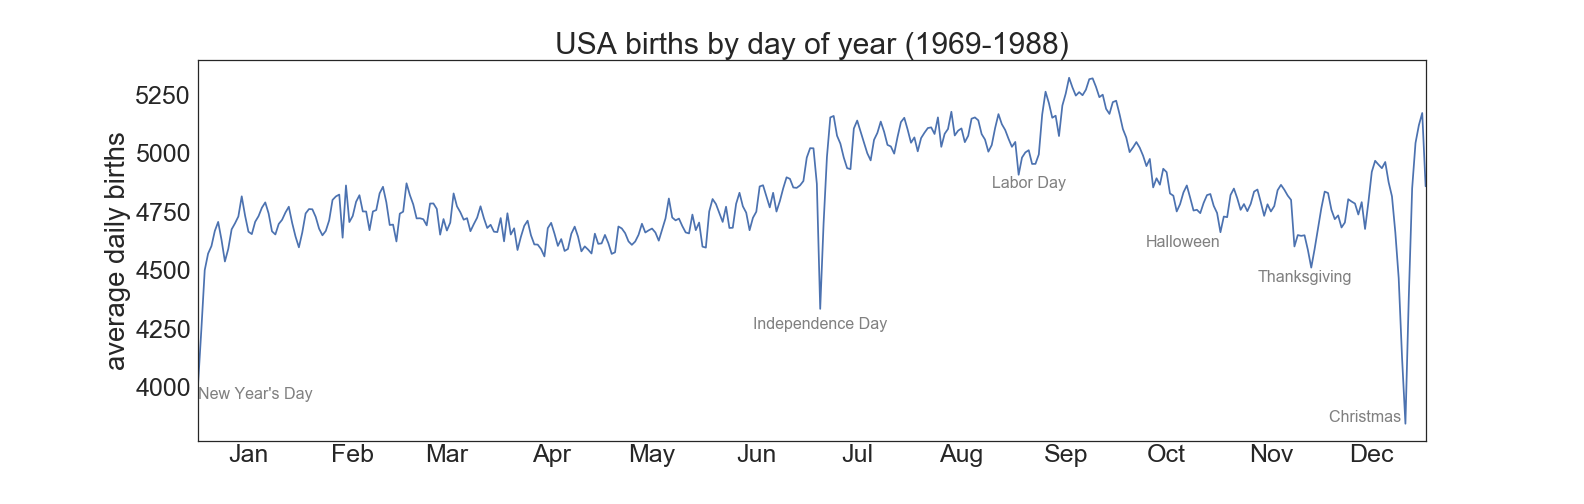

In [49]:
# to see contents of a saved image
from IPython.display import Image
Image('images/my_figure.png')